<a href="https://colab.research.google.com/github/jamshaid2610/analysis-jcl/blob/main/Bowling%20Scorecard/Analysis/Bowling_Performance_Analysis_(Autoencoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/EDA/Bowler Performance Metrics.csv')
scaled_df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/EDA/Bowling Performance Metrics (Scaled).csv')

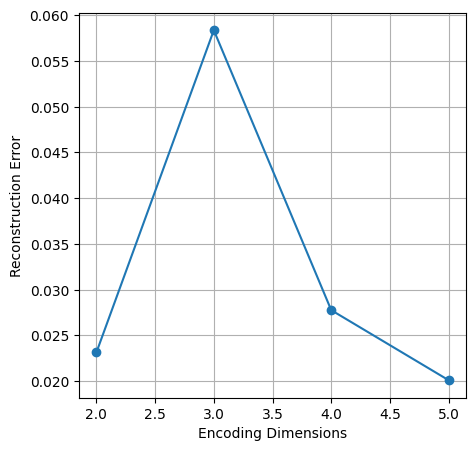

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(scaled_df, test_size=0.2, random_state=42)

encoding_dims = range(2,6)
reconstruction_errors = []

for dim in encoding_dims:
  input_dim = scaled_df.shape[1]
  input_layer = Input(shape=(input_dim,))
  encoder = Dense(dim, activation='relu')(input_layer)
  decoder = Dense(input_dim, activation='linear')(encoder)
  autoencoder = Model(input_layer, decoder)

  autoencoder.compile(optimizer='adam', loss='mean_squared_error')
  autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test), verbose=0)

  reconstruction_error = autoencoder.evaluate(X_test, X_test, verbose=0)
  reconstruction_errors.append(reconstruction_error)

plt.figure(figsize=(5, 5))
plt.plot(encoding_dims, reconstruction_errors, marker='o')
plt.xlabel('Encoding Dimensions')
plt.ylabel('Reconstruction Error')
# plt.title('Reconstruction Error vs. Encoding Dimensions')
plt.grid(True)
plt.show()

In [ ]:
optimal_dim = encoding_dims[np.argmin(reconstruction_errors)]
print(optimal_dim)

5


In [ ]:
n_features = scaled_df.shape[1]
n_features

9

In [ ]:
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

input_layer = Input(shape=(n_features,))
encoder = Dense(n_features-1)(input_layer)
encoder = LeakyReLU()(encoder)
encoder = Dense(n_features-1)(encoder)
encoder = LeakyReLU()(encoder)
encoder = Dense(n_features-1)(encoder)
encoder = LeakyReLU()(encoder)
encoder = Dense(optimal_dim)(encoder)

decoder = Dense(n_features+1)(encoder)
decoder = LeakyReLU()(decoder)
decoder = Dense(n_features+1)(decoder)
decoder = LeakyReLU()(decoder)
decoder = Dense(n_features+1)(decoder)
decoder = LeakyReLU()(decoder)
decoder = Dense(n_features, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
encoder = Model(inputs=input_layer, outputs=encoder)
autoencoder.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

autoencoder.fit(scaled_df, scaled_df, epochs=100, batch_size=15, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

encoded_data = encoder.predict(scaled_df)

encoded_df = pd.DataFrame(encoded_data, columns=[f'ED {i+1}' for i in range(optimal_dim)])

Epoch 1/100
21/21 [==============================] - 2s 15ms/step - loss: 0.2471 - val_loss: 0.2006 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 0.1863 - val_loss: 0.1745 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 0.1601 - val_loss: 0.1469 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 0.1290 - val_loss: 0.1132 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 0.0917 - val_loss: 0.0755 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 0.0570 - val_loss: 0.0482 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 0.0380 - val_loss: 0.0353 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 0.0311 - val_loss: 0.0314 - lr: 0.0010
Epoch 9/100
21/21 [==============================] - 0s 7ms/step - loss: 0.0296 - val_loss: 0.0306 - lr

In [ ]:
encoded_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/Bowling Performance Metrics (Encoded).csv', index=False)

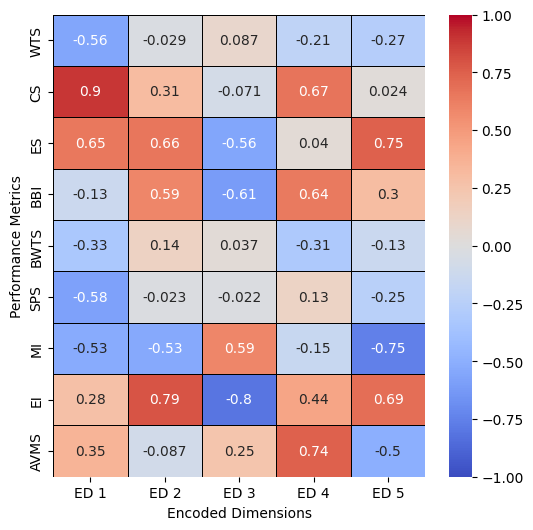

In [ ]:
correlation_matrix = scaled_df.corrwith(encoded_df, axis=0).to_frame().transpose()

# Transpose the correlation matrix for better readability
correlation_matrix = pd.concat([scaled_df.corrwith(encoded_df[col]) for col in encoded_df.columns], axis=1)
correlation_matrix.columns = encoded_df.columns

plt.figure(figsize=(6, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, linecolor='black', linewidths=0.5)

# plt.title('Correlation Between Scaled Performance Metrics and Encoded Dimensions')
plt.xlabel('Encoded Dimensions')
plt.ylabel('Performance Metrics')

plt.show()



# KMeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

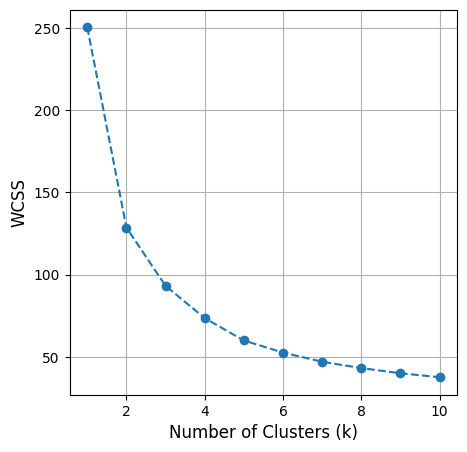

In [ ]:
from sklearn.cluster import KMeans

wcss = []
k_values = range(1,11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(encoded_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(5, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
# plt.title('Optimal Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

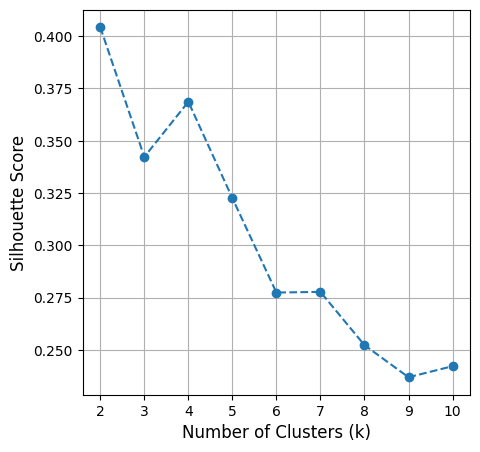

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in k_values[1:]:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(encoded_df)
  score = silhouette_score(encoded_df, kmeans.labels_)
  sil_scores.append(score)

plt.figure(figsize=(5, 5))
plt.plot(k_values[1:], sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
# plt.title('Optimal Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
optimal_k = k_values[1:][np.argmax(sil_scores)]

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(encoded_df)


encoded_df['KCluster'] = clusters
df['KCluster'] = clusters
scaled_df['KCluster'] = clusters



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


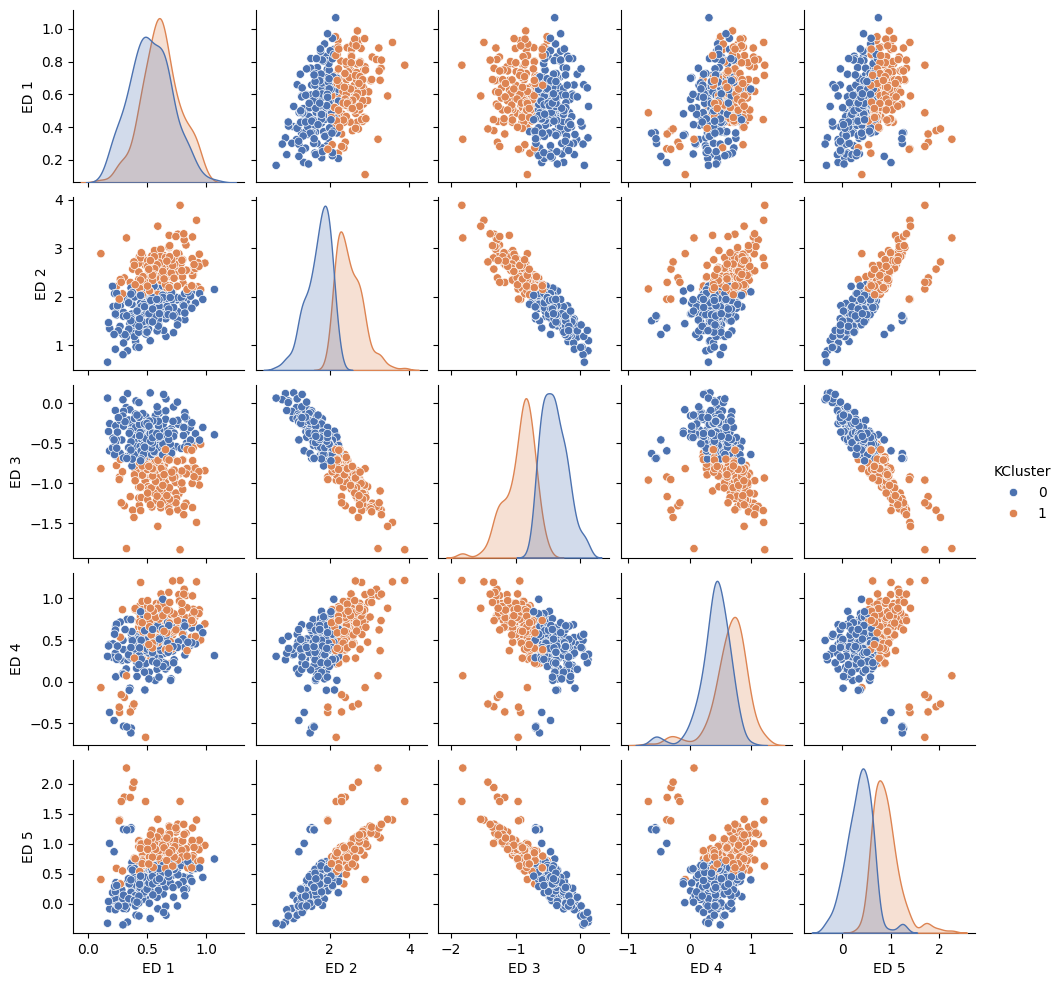

In [ ]:
sns.pairplot(encoded_df, hue='KCluster', palette='deep', diag_kind='kde', height=2, aspect=1)
# plt.suptitle('Pairplot of Encoded Dimensions', y=1.02)
plt.show()


In [ ]:
kcluster_means_summary = scaled_df.groupby('KCluster').mean()
kcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/KMeans Summary (Autoencoder).csv')
kcluster_means_summary

,WTS,CS,ES,BBI,BWTS,SPS,MI,EI,AVMS
KCluster,,,,,,,,,
0,0.244319,0.541576,0.481303,0.446034,0.085989,0.312063,0.349618,0.175701,0.689243
1,0.223681,0.614264,0.644541,0.633844,0.079285,0.312932,0.137216,0.422987,0.653097


In [ ]:
kcluster_descriptive = scaled_df.groupby('KCluster').describe()
kcluster_descriptive.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/KMeans Descriptive (Autoencoder).csv')
kcluster_descriptive

WTS                                                         \
          count      mean       std  min       25%       50%       75%   
KCluster                                                                 
0         207.0  0.244319  0.139960  0.0  0.154545  0.214883  0.337246   
1         183.0  0.223681  0.134799  0.0  0.129366  0.215333  0.294003   

                       CS            ...        EI             AVMS            \
               max  count      mean  ...       75%       max  count      mean   
KCluster                             ...                                        
0         0.754007  207.0  0.541576  ...  0.255273  0.531479  207.0  0.689243   
1         1.000000  183.0  0.614264  ...  0.527177  1.000000  183.0  0.653097   

                                                                 
               std  min       25%       50%       75%       max  
KCluster                                                         
0         0.156270  0.0  0.634210  0.708063  0.771475  0.982895  
1         0.176575  0.0  0.619543  0.668200  0.740081  1.000000  

[2 rows x 72 columns]

In [ ]:
weights = {
    'WTS': 1,
    'CS': 1,
    'ES': 1,
    'BBI': 1,
    'BWTS': 1,
    'SPS': 1,
    'EI': 1,
    'MI': 1,
    'AVMS': 1,
}

cluster_0_data = scaled_df[clusters==0].copy()
cluster_0_data['Composite Score'] = (
    cluster_0_data['BBI'] * weights['BBI'] +
    cluster_0_data['WTS'] * weights['WTS'] +
    cluster_0_data['CS'] * weights['CS'] +
    cluster_0_data['EI'] * weights['EI'] +
    cluster_0_data['MI'] * weights['MI'] +
    cluster_0_data['BWTS'] * weights['BWTS'] +
    cluster_0_data['SPS'] * weights['SPS'] +
    cluster_0_data['ES'] * weights['ES'] +
    cluster_0_data['AVMS'] * weights['AVMS']
)

cluster_0_data['Bowler'] = df[clusters==0]['Bowler'].values
cluster_0_data['Team'] = df[clusters==0]['Team'].values

ranked_kcluster = cluster_0_data[['Bowler', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)
ranked_kcluster

,Bowler,Team,Composite Score
126,Hannah McNally,Leadgate CC Under 13,4.945510
336,Sam Raine,Murton CC Under 13,4.528458
345,Shantush Sivakumar,Wearmouth & YAV CC Under 13,4.495707
49,Callum Andersen,Boldon CA CC Under 13,4.364122
179,Jake Pattison,Seaham Harbour CC Under 13 Yellow,4.310757
...,...,...,...
389,Zak McDermott,Lintz CC Under 13,1.354288
35,Beth Poole,Raby Castle CC Under 13,1.352985
230,Lewis Young,Lintz CC Under 13,1.335147
189,Jamie Lemin,Blaydon CC Under 13,0.981481


In [ ]:
ranked_kcluster['Rank'] = range(1, len(ranked_kcluster) + 1)
ranked_kcluster = ranked_kcluster[['Rank', 'Bowler', 'Team', 'Composite Score']]
ranked_kcluster

,Rank,Bowler,Team,Composite Score
126,1,Hannah McNally,Leadgate CC Under 13,4.945510
336,2,Sam Raine,Murton CC Under 13,4.528458
345,3,Shantush Sivakumar,Wearmouth & YAV CC Under 13,4.495707
49,4,Callum Andersen,Boldon CA CC Under 13,4.364122
179,5,Jake Pattison,Seaham Harbour CC Under 13 Yellow,4.310757
...,...,...,...,...
389,203,Zak McDermott,Lintz CC Under 13,1.354288
35,204,Beth Poole,Raby Castle CC Under 13,1.352985
230,205,Lewis Young,Lintz CC Under 13,1.335147
189,206,Jamie Lemin,Blaydon CC Under 13,0.981481


In [ ]:
ranked_kcluster.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/Ranked Bowlers KMeans (Autoencoder).csv', index=False)

# Hierarchical Clustering

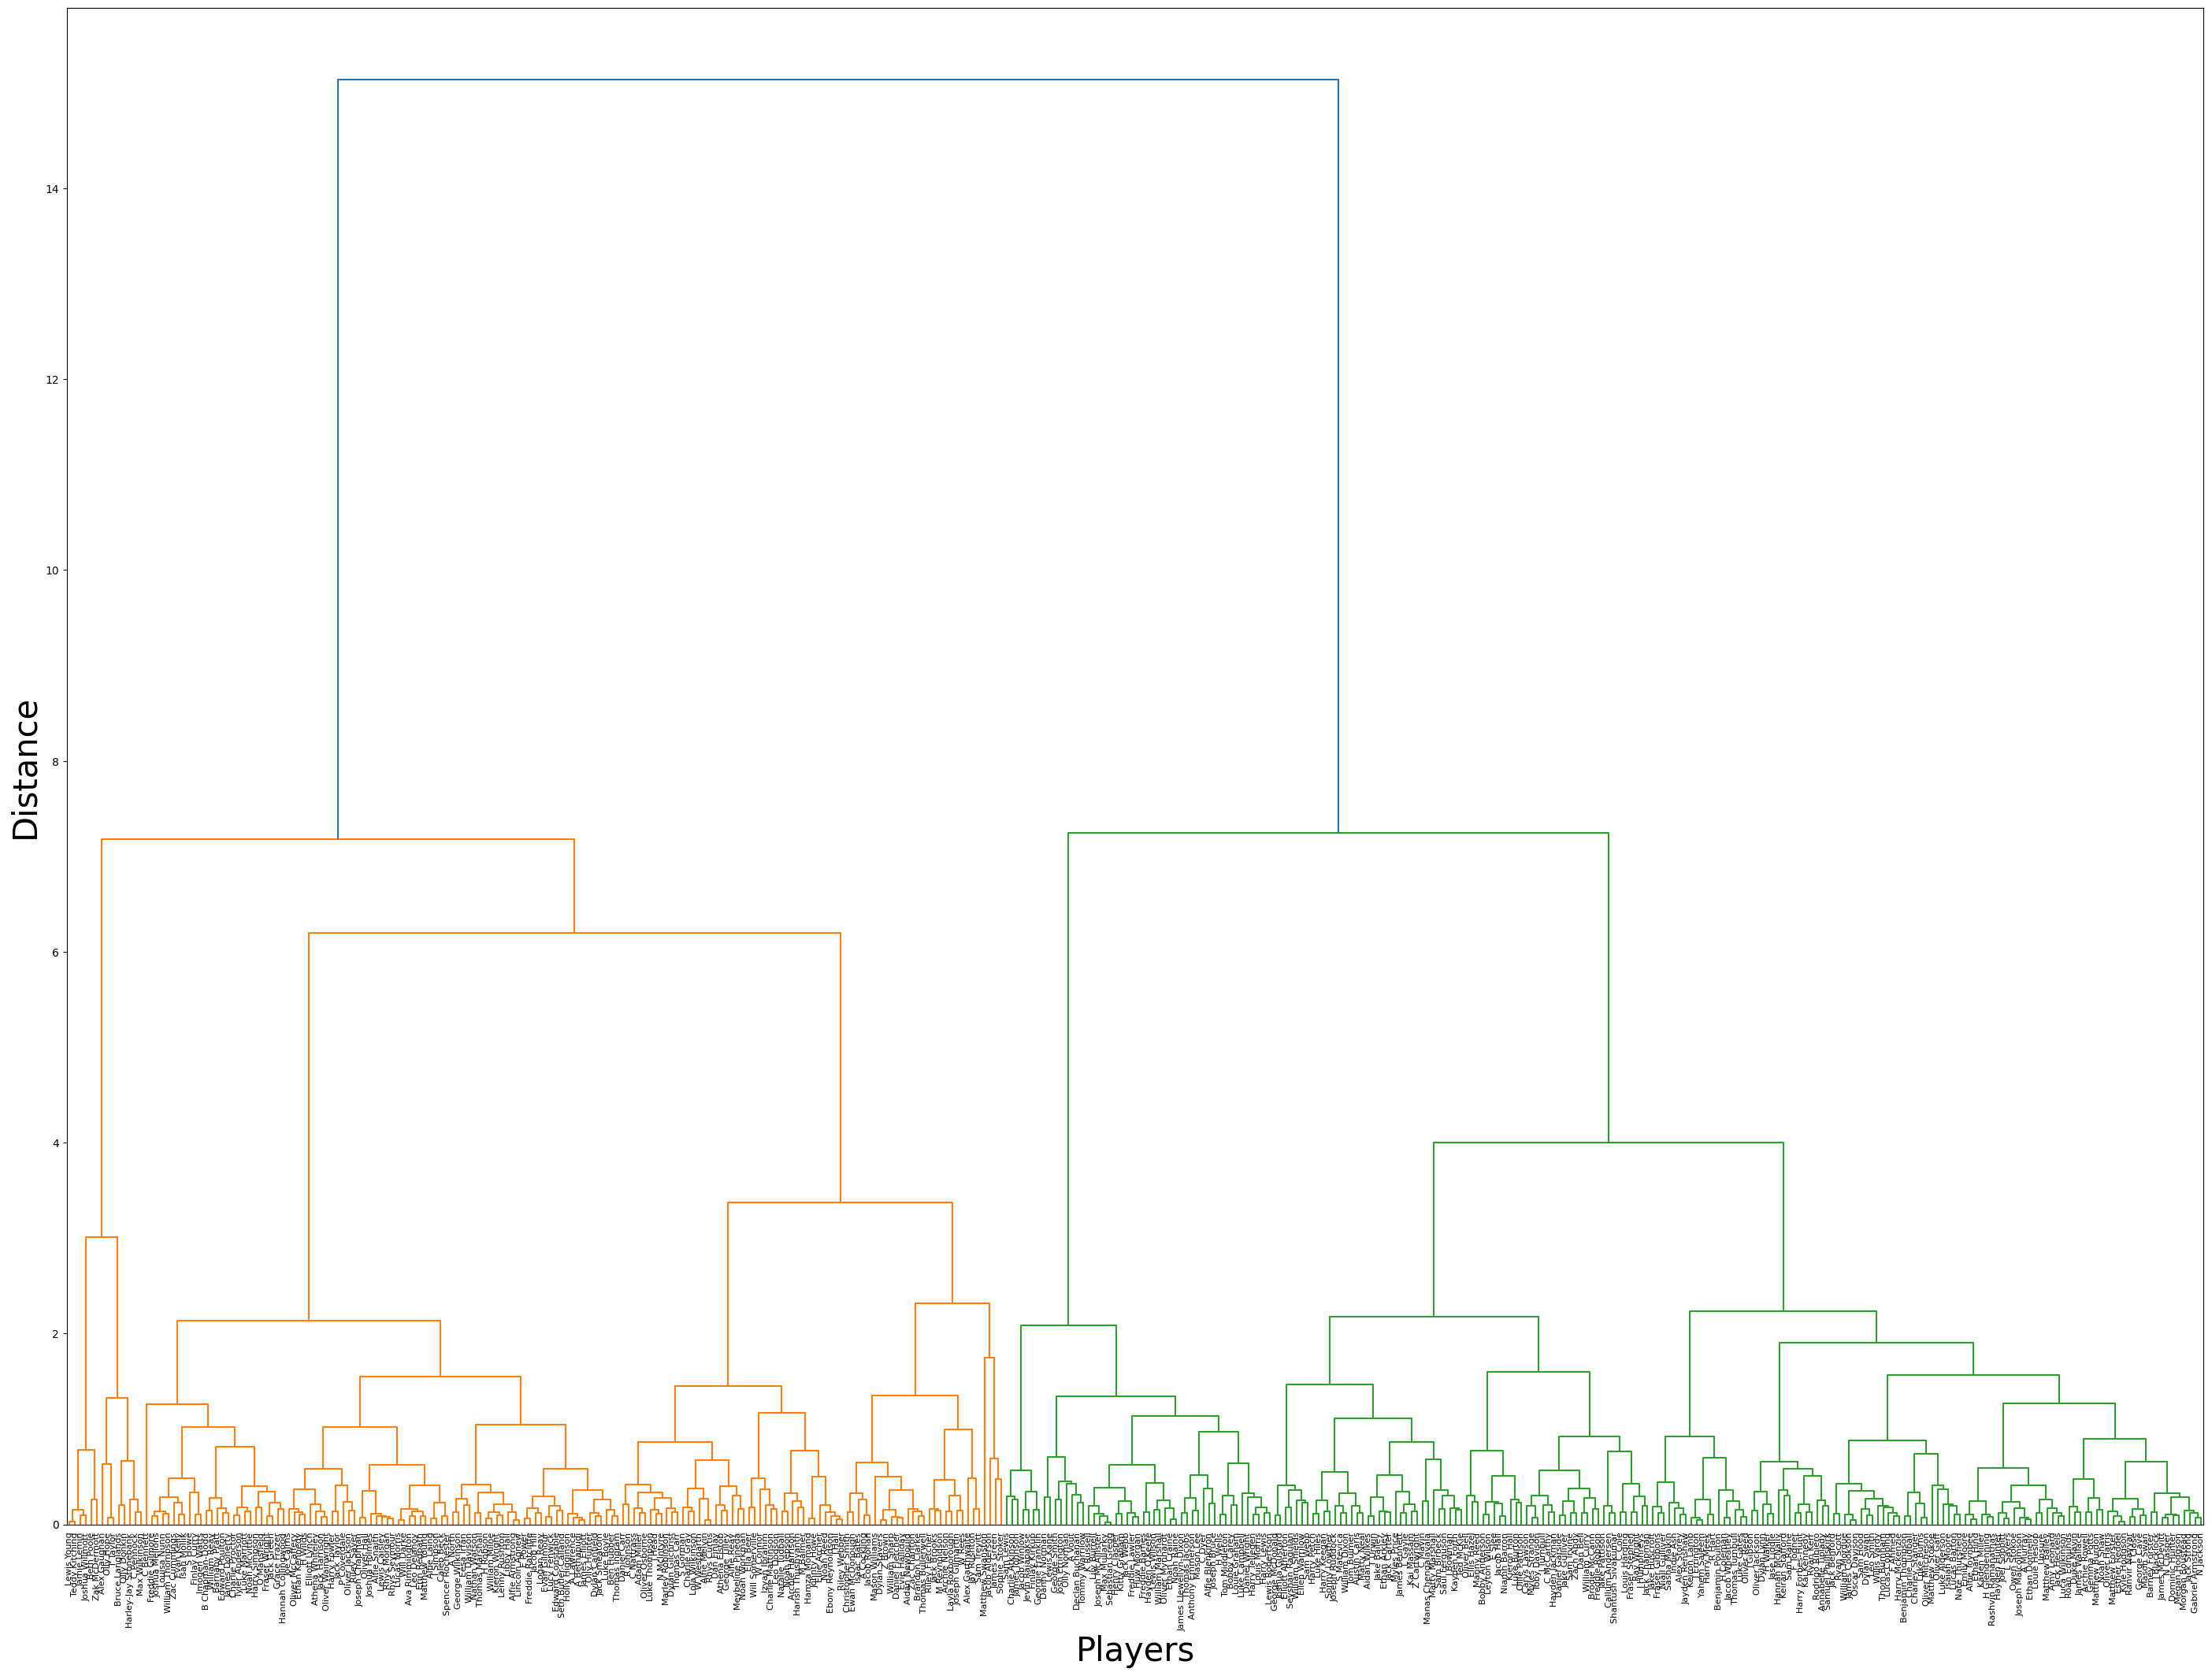

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

h_linkage = linkage(encoded_df.drop('KCluster', axis=1), method='ward')

plt.figure(figsize=(35,25))
dendrogram(h_linkage, labels=df['Bowler'].values, leaf_rotation=90, leaf_font_size=8)
# plt.title('Hierarchical Clustering Dendrgram', fontsize=25)
plt.xlabel('Players', fontsize=30)
plt.ylabel('Distance', fontsize=30)
plt.show()

In [ ]:
h_labels = fcluster(h_linkage, t=10, criterion='distance')

df['Hcluster'] = h_labels
scaled_df['Hcluster'] = h_labels
encoded_df['Hcluster'] = h_labels


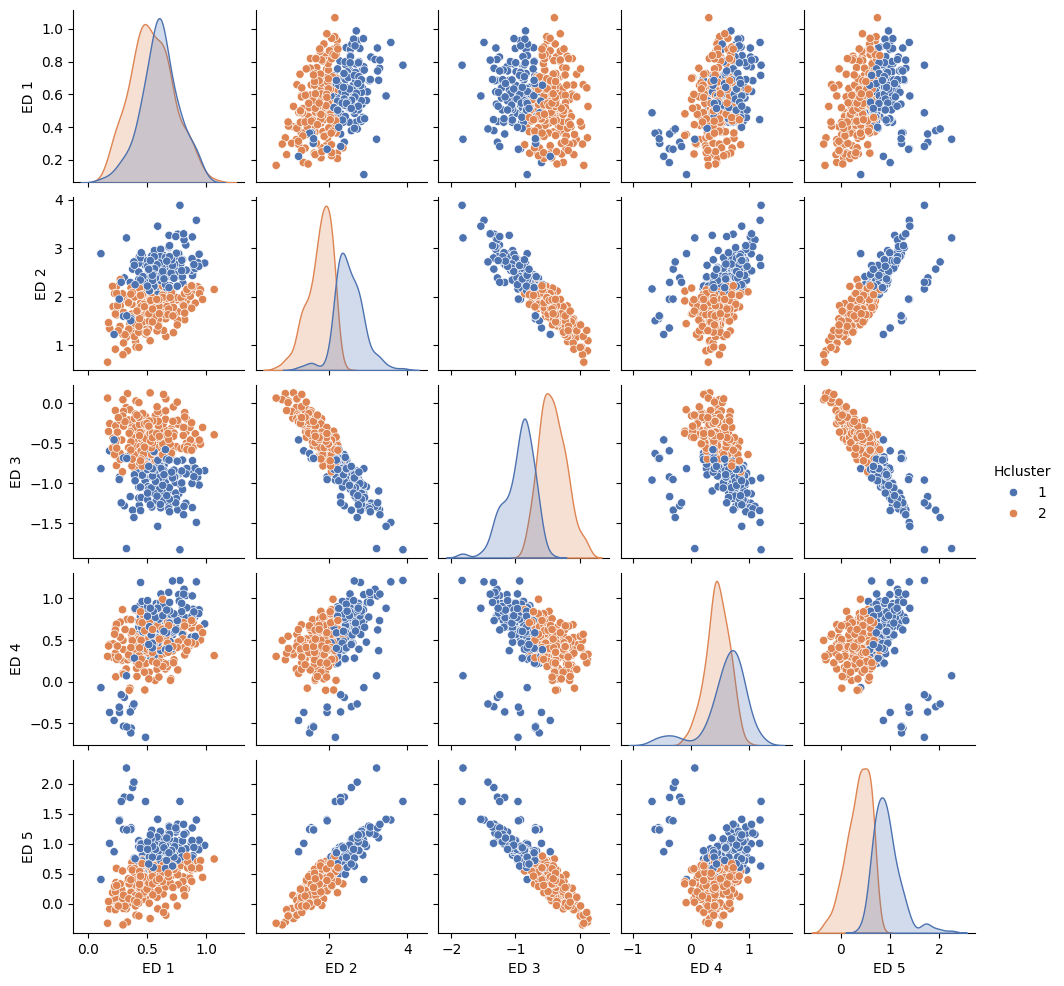

In [ ]:
sns.pairplot(encoded_df.drop('KCluster', axis=1), hue='Hcluster', palette='deep', diag_kind='kde', height=2, aspect=1)
# plt.suptitle('Pairplot of Encoded Dimensions', y=1.02, fontsize=16)
plt.show()


In [ ]:
hcluster_means_summary = scaled_df.drop('KCluster',axis=1).groupby('Hcluster').mean()
hcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/HCluster Summary (Autoencoder).csv')
hcluster_means_summary

,WTS,CS,ES,BBI,BWTS,SPS,MI,EI,AVMS
Hcluster,,,,,,,,,
1,0.217624,0.588576,0.654334,0.623884,0.083991,0.297248,0.131378,0.427902,0.620451
2,0.247917,0.565616,0.482601,0.464102,0.081947,0.324357,0.342539,0.185413,0.712754


In [ ]:
hcluster_descriptive = scaled_df.drop('KCluster',axis=1).groupby('Hcluster').describe()
hcluster_descriptive.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/HCluster Descriptive (Autoencoder).csv')
hcluster_descriptive

WTS                                                              \
          count      mean       std       min       25%       50%       75%   
Hcluster                                                                      
1         171.0  0.217624  0.137222  0.000000  0.124311  0.215333  0.294003   
2         219.0  0.247917  0.137050  0.042271  0.154545  0.214883  0.337246   

                       CS            ...        EI             AVMS            \
               max  count      mean  ...       75%       max  count      mean   
Hcluster                             ...                                        
1         1.000000  171.0  0.588576  ...  0.533298  1.000000  171.0  0.620451   
2         0.754007  219.0  0.565616  ...  0.263234  0.531479  219.0  0.712754   

                                                                      
               std       min       25%       50%       75%       max  
Hcluster                                                              
1         0.214084  0.000000  0.604637  0.655397  0.728902  1.000000  
2         0.100968  0.446536  0.645317  0.714540  0.777982  0.982895  

[2 rows x 72 columns]

In [ ]:
hcluster_2_data = scaled_df[h_labels==2].copy()
hcluster_2_data['Composite Score'] = (
    hcluster_2_data['BBI'] * weights['BBI'] +
    hcluster_2_data['WTS'] * weights['WTS'] +
    hcluster_2_data['CS'] * weights['CS'] +
    hcluster_2_data['EI'] * weights['EI'] +
    hcluster_2_data['MI'] * weights['MI'] +
    hcluster_2_data['BWTS'] * weights['BWTS'] +
    hcluster_2_data['SPS'] * weights['SPS'] +
    hcluster_2_data['ES'] * weights['ES'] +
    hcluster_2_data['AVMS'] * weights['AVMS']
)

hcluster_2_data['Bowler'] = df[h_labels==2]['Bowler'].values
hcluster_2_data['Team'] = df[h_labels==2]['Team'].values

ranked_hcluster = hcluster_2_data[['Bowler', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)
ranked_hcluster

,Bowler,Team,Composite Score
126,Hannah McNally,Leadgate CC Under 13,4.945510
213,Keiran Stafford,Hylton CCC Under 13,4.897610
336,Sam Raine,Murton CC Under 13,4.528458
345,Shantush Sivakumar,Wearmouth & YAV CC Under 13,4.495707
49,Callum Andersen,Boldon CA CC Under 13,4.364122
...,...,...,...
63,Daniel Wright,Burnmoor CC Under 13,2.639355
362,Tom Bulmer,Sacriston CC Under 13 - Red,2.637893
140,Hayden O'Keefe,Bishop Auckland CC Under 13,2.614458
331,S Matevica,Tudhoe CC Under 13,2.605045


In [ ]:
ranked_hcluster['Rank'] = range(1, len(ranked_hcluster) + 1)
ranked_hcluster = ranked_hcluster[['Rank', 'Bowler', 'Team', 'Composite Score']]
ranked_hcluster

,Rank,Bowler,Team,Composite Score
126,1,Hannah McNally,Leadgate CC Under 13,4.945510
213,2,Keiran Stafford,Hylton CCC Under 13,4.897610
336,3,Sam Raine,Murton CC Under 13,4.528458
345,4,Shantush Sivakumar,Wearmouth & YAV CC Under 13,4.495707
49,5,Callum Andersen,Boldon CA CC Under 13,4.364122
...,...,...,...,...
63,215,Daniel Wright,Burnmoor CC Under 13,2.639355
362,216,Tom Bulmer,Sacriston CC Under 13 - Red,2.637893
140,217,Hayden O'Keefe,Bishop Auckland CC Under 13,2.614458
331,218,S Matevica,Tudhoe CC Under 13,2.605045


In [ ]:
ranked_hcluster.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/Ranked Bowlers HCluster (Autoencoder).csv', index=False)

In [ ]:
df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/Bowler Performance Metrics (Autoencoder) with clusters.csv', index=False)
scaled_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/Bowler Performance Metrics (Scaled) with clusters.csv', index=False)
encoded_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (Autoencoders)/Bowler Performance Metrics (Encoded) with clusters.csv', index=False)